<a href="https://colab.research.google.com/github/edycocon/LaboratoriosSeminarioProfesional1/blob/master/Copia_de_lesson4_convnets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [2]:
%tensorflow_version 2.x

import tensorflow as tf
import tensorflow_hub as hub


from tensorflow.keras import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import get_file
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import shutil
import numpy as np
import PIL.Image as Image
import matplotlib.pylab as plt

#dark mode
plt.rc_context({'xtick.color':'w', 'ytick.color':'w', 'text.color':'w', 'axes.labelcolor':'w'})

seed=1234
np.random.seed(seed)
tf.random.set_seed(seed)

TensorFlow 2.x selected.


#Dataset

In [4]:
#path_to_file = tf.keras.utils.get_file('cats_and_dogs.zip', 
 #                                     origin='https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip', 
  #                                    extract=True)

!pip install googleimagedownloader
from googleimagedownloader.googleimagedownloader import GoogleImageDownloader

#path = os.path.join(os.path.dirname(path_to_file), 'cats_and_dogs_filtered')




  Created wheel for requests-futures: filename=requests_futures-1.0.0-cp36-none-any.whl size=7013 sha256=4d2abeb9063f04bc2766082d506bd3c4615c9b625579bcdebee2a4894990a85c
  Stored in directory: /root/.cache/pip/wheels/26/d0/f5/dc4e4a37bbe55c9acf967d2bd899152412c1e49c227f5395ff
Successfully built requests-futures


32768/31719 [==============================] - 0s 0us/step


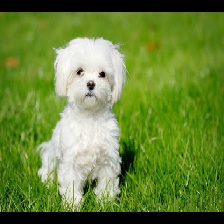

In [5]:

#path = os.path.join(os.path.dirname(path_to_file), 'cats_and_dogs_filtered')

IMAGE_SIZE = (224, 224)
classifier_url ="https://tfhub.dev/google/imagenet/resnet_v2_50/classification/4" 

classifier = Sequential([
    hub.KerasLayer(classifier_url, input_shape=IMAGE_SIZE+(3,))
])

test_image = get_file('img.jpg','https://i.ytimg.com/vi/En5EoFkdCWk/hqdefault.jpg')
test_image = Image.open(test_image).resize(IMAGE_SIZE)
test_image



In [0]:
##IMAGE_SIZE = (224, 224)

##train_dir = os.path.join(path, 'train')
##validation_dir = os.path.join(path, 'validation')

#train_cats_dir = os.path.join(train_dir, 'cats')  
#train_dogs_dir = os.path.join(train_dir, 'dogs')  
#validation_cats_dir = os.path.join(validation_dir, 'cats') 
#validation_dogs_dir = os.path.join(validation_dir, 'dogs')  

class_names = ['Batman','Guason']
path = 'dataset/'

train_dir = os.path.join(path, 'train')
validation_dir = os.path.join(path, 'validation')

train_ca_dir = os.path.join(train_dir, 'Batman')  
train_im_dir = os.path.join(train_dir, 'Guason')  
validation_ca_dir = os.path.join(validation_dir, 'Batman') 
validation_im_dir = os.path.join(validation_dir, 'Guason')  

os.makedirs(train_ca_dir)
os.makedirs(train_im_dir)
os.makedirs(validation_ca_dir)    
os.makedirs(validation_im_dir)



In [0]:
def manage_images(src, dest_train, dest_val, image_resize=IMAGE_SIZE, val_split=0.1, prefix=''):
  total = len(os.listdir(src))
  val = np.int(total*val_split)
  count = 0
  files = os.listdir(src)

  for file_name in files:
    try:
      dest = dest_train if count >= val else dest_val
      dest_file = os.path.join(dest, prefix + file_name) 

      img = Image.open(os.path.join(src,file_name))
      img.verify()
      # reopen because verify() was called
      # If you need to load the image after using this method, you must reopen the image file.
      # https://pillow.readthedocs.io/en/3.1.x/reference/Image.html
      img = Image.open(os.path.join(src,file_name))
      #resize
      img = img.resize(image_resize, Image.ANTIALIAS)
      #move
      img.save(dest_file)  
      count+=1 
    except Exception as e:
        print('Invalid image: ',file_name,e)
        if os.path.exists(dest_file):
          os.remove(dest_file)
  return


In [9]:
img_dir = os.path.realpath('Images/')
#print(img_dir)
os.mkdir("/content/Images")
os.listdir("/content/")

['.config', 'Images', 'dataset', 'sample_data']

In [10]:
queries = ['Dark','Bruce Wayne','cosplay','begins','wallpaper', 'cartoon']
pos = 0
for query in queries:
  image = GoogleImageDownloader(Query='Batman '+query, numberImage=100)
  try:
    image.downloadImages()
  except Exception as e:
    print('Error ',e)
  #verify, resize, move and split sets
  manage_images(img_dir, train_ca_dir, validation_ca_dir,prefix=str(pos)+'-')
  pos+=1

https://www.google.co.in/search?q=Batman Dark&source=lnms&tbm=isch
Total Time : 0:00:00.000406
https://www.google.co.in/search?q=Batman Bruce Wayne&source=lnms&tbm=isch
Total Time : 0:00:00.000387
https://www.google.co.in/search?q=Batman cosplay&source=lnms&tbm=isch
Total Time : 0:00:00.000358
https://www.google.co.in/search?q=Batman begins&source=lnms&tbm=isch
Total Time : 0:00:00.000463
https://www.google.co.in/search?q=Batman wallpaper&source=lnms&tbm=isch
Error  HTTPSConnectionPool(host='picserio.com', port=443): Max retries exceeded with url: /data/out/373/batman-wallpaper-for-windows-10_5795589.png (Caused by SSLError(SSLError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:852)'),))
Invalid image:  32.jpg cannot identify image file '/content/Images/32.jpg'
Invalid image:  95.jpg cannot identify image file '/content/Images/95.jpg'
Invalid image:  77.jpg cannot identify image file '/content/Images/77.jpg'
Invalid image:  41.jpg cannot write mode RGBA as JPEG

In [12]:
queries = ['Heath Ledger','clown','joker','cartoon','wallpaper']
pos = 0
for query in queries:
  image = GoogleImageDownloader(Query='Guason '+query, numberImage=100)
  try:
    image.downloadImages()
  except Exception as e:
    print('Error ',e)
  #verify, resize, move and split sets
  manage_images(img_dir, train_im_dir, validation_im_dir,prefix=str(pos)+'-')
  pos+=1

https://www.google.co.in/search?q=Guason Heath Ledger&source=lnms&tbm=isch
Total Time : 0:00:00.000384
Invalid image:  32.jpg cannot identify image file '/content/Images/32.jpg'
Invalid image:  95.jpg cannot identify image file '/content/Images/95.jpg'
Invalid image:  77.jpg cannot identify image file '/content/Images/77.jpg'
Invalid image:  41.jpg cannot write mode RGBA as JPEG
Invalid image:  21.jpg cannot identify image file '/content/Images/21.jpg'
Invalid image:  59.jpg cannot identify image file '/content/Images/59.jpg'
https://www.google.co.in/search?q=Guason clown&source=lnms&tbm=isch
Total Time : 0:00:00.000375
Invalid image:  32.jpg cannot identify image file '/content/Images/32.jpg'
Invalid image:  95.jpg cannot identify image file '/content/Images/95.jpg'
Invalid image:  77.jpg cannot identify image file '/content/Images/77.jpg'
Invalid image:  41.jpg cannot write mode RGBA as JPEG
Invalid image:  21.jpg cannot identify image file '/content/Images/21.jpg'
Invalid image:  59

In [13]:


num_batman_tr = len(os.listdir(train_ca_dir))
num_guason_tr = len(os.listdir(train_im_dir))

num_batman_val = len(os.listdir(validation_ca_dir))
num_guason_val = len(os.listdir(validation_im_dir))

total_train = num_batman_tr + num_guason_tr
total_val = num_batman_val + num_guason_val

print('total training cat images:', num_batman_tr)
print('total training dog images:', num_guason_tr)

print('total validation cat images:', num_batman_val)
print('total validation dog images:', num_guason_val)

print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 168
total training dog images: 420
total validation cat images: 18
total validation dog images: 45
Total training images: 588
Total validation images: 63


In [0]:
epochs = 15
batch_size = 128
IMAGE_SIZE = (150, 150)
CLASS_NAMES = ['batman','guason']

In [0]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [16]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=IMAGE_SIZE,
                                                           class_mode='binary')

Found 588 images belonging to 2 classes.


In [17]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=IMAGE_SIZE,
                                                              class_mode='binary')

Found 63 images belonging to 2 classes.


In [18]:
training_batch, labels_batch = next(train_data_gen)
training_batch.shape, labels_batch.shape

((128, 150, 150, 3), (128,))

In [0]:
def plot_images(img_batch, labels=None):
  range_count = 15 if len(img_batch) > 15 else len(img_batch)
  plt.figure(figsize=(12,12))
  for i in range(range_count):
    plt.subplot(4,5,i+1) 
    plt.imshow(img_batch[i])
    if (labels is not None):
      plt.title(CLASS_NAMES[np.int(labels[i])]) 
    plt.axis('off')

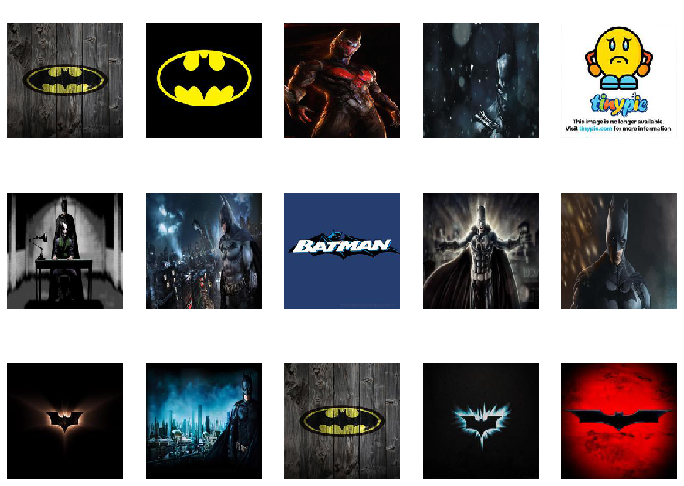

In [20]:
plot_images(training_batch, labels_batch)

#Fully connected neural netowrk

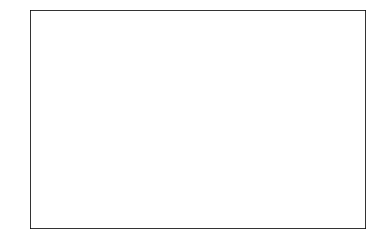

In [21]:
def plot_accuracy_and_loss(history, acc_ylim=[min(plt.ylim()),1.0], loss_ylim=[0,2.0]):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(acc, label='Training Accuracy')
  plt.plot(val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.ylabel('Accuracy')
  plt.ylim(acc_ylim)
  plt.title('Training and Validation Accuracy')

  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Training Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.ylabel('Cross Entropy')
  plt.ylim(loss_ylim)
  plt.title('Training and Validation Loss')
  plt.xlabel('epoch')
  plt.show()

def train(m, train_data=train_data_gen, epochs=epochs):
  return m.fit(
            train_data,
            steps_per_epoch=total_train // batch_size,
            epochs=epochs,
            validation_data=val_data_gen,
            validation_steps=total_val // batch_size
          )

In [0]:
model = Sequential([
  Flatten(input_shape=IMAGE_SIZE+(3,)),
  Dense(1024, activation='tanh'),
  Dense(512, activation='tanh'),
  Dense(1, activation='sigmoid')
])

In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 67500)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              69121024  
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 513       
Total params: 69,646,337
Trainable params: 69,646,337
Non-trainable params: 0
_________________________________________________________________


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 4 steps, validate for 1 steps
Epoch 1/15
4/4 [==============================] - 3s 762ms/step - loss: 2.4105 - accuracy: 0.6804 - val_loss: 5.0232 - val_accuracy: 0.2857
Epoch 2/15
4/4 [==============================] - 2s 565ms/step - loss: 2.4721 - accuracy: 0.3945 - val_loss: 1.0254 - val_accuracy: 0.7143
Epoch 3/15
4/4 [==============================] - 2s 539ms/step - loss: 1.0512 - accuracy: 0.7152 - val_loss: 0.8869 - val_accuracy: 0.7143
Epoch 4/15
4/4 [==============================] - 2s 536ms/step - loss: 0.7673 - accuracy: 0.7152 - val_loss: 0.6337 - val_accuracy: 0.7143
Epoch 5/15
4/4 [==============================] - 2s 528ms/step - loss: 0.6095 - accuracy: 0.7152 - val_loss: 0.6058 - val_accuracy: 0.7143
Epoch 6/15
4/4 [==============================] - 2s 534ms/step - loss: 0.6222 - accuracy: 0.7152 - val_loss: 0.6390 - val_accuracy: 0.7143
Epoch 7/15
4/4 [==============================] - 2s 527ms/step - loss: 0.6320 - accuracy: 0.7130 - val_loss: 0.6115 - v

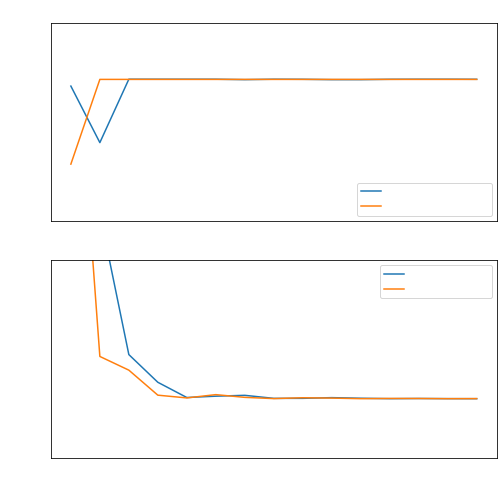

In [25]:
history = train(model)
plot_accuracy_and_loss(history)

#ConvNet

##Convolution

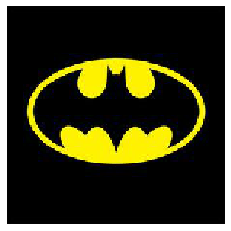

In [26]:
img = training_batch[1]
plt.axis('off')
plt.imshow(img)


In [0]:
def plot_filters(layer):
    filters = layer.shape[3]

    columns = 8
    #rows = ((filters-1) // columns) + 1
    plt.figure(figsize=(20,20))    
    for i in range(filters):
      plt.subplot(columns, columns, i+1)
      plt.title('Filter ' + str(i), color='white')
      plt.axis('off')
      plt.imshow(layer[0,:,:,i], interpolation="nearest", cmap="gray")

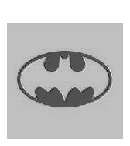

In [28]:
conv = Conv2D(1, 3, padding='same', input_shape=IMAGE_SIZE+(3,))
out = conv(tf.expand_dims(img, 0))
plot_filters(out.numpy())

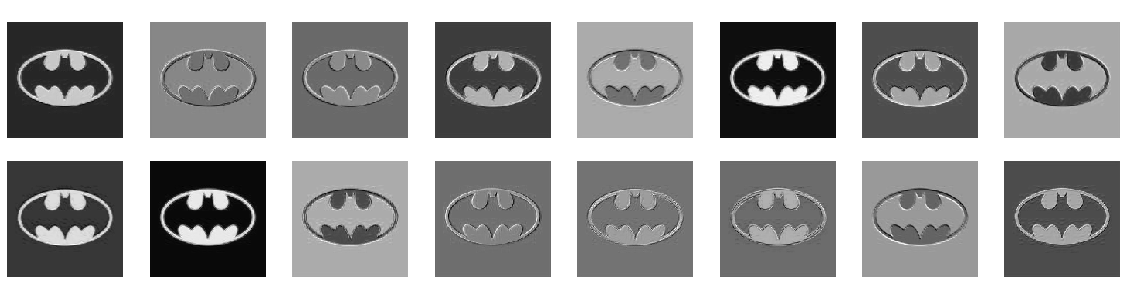

In [29]:
conv = Conv2D(16, 3, padding='same', input_shape=IMAGE_SIZE+(3,))
out = conv(tf.expand_dims(img, 0))
plot_filters(out.numpy())

##ConvModel

In [0]:
model = Sequential([
    Conv2D(32, 3, padding='same', activation='relu', input_shape=IMAGE_SIZE+(3,)),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [31]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 41472)            

In [0]:
def plot_model_filters(layers, img):
  input = tf.expand_dims(img, 0)
  for filter_layer in layers:
    output = filter_layer(input)    
    input = output
    print(filter_layer)
    plot_filters(output.numpy())
  return


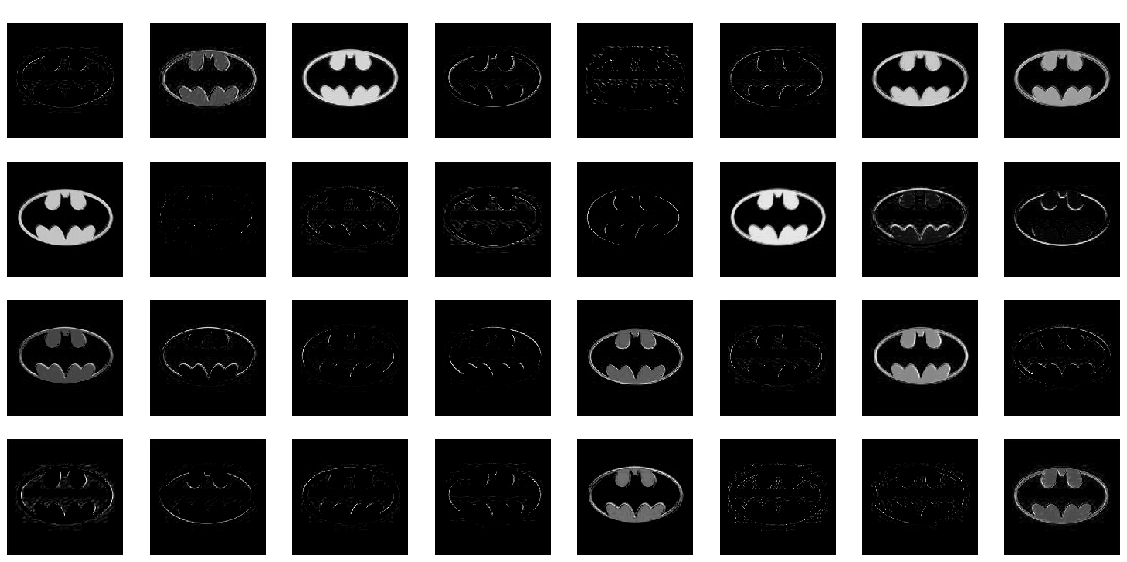

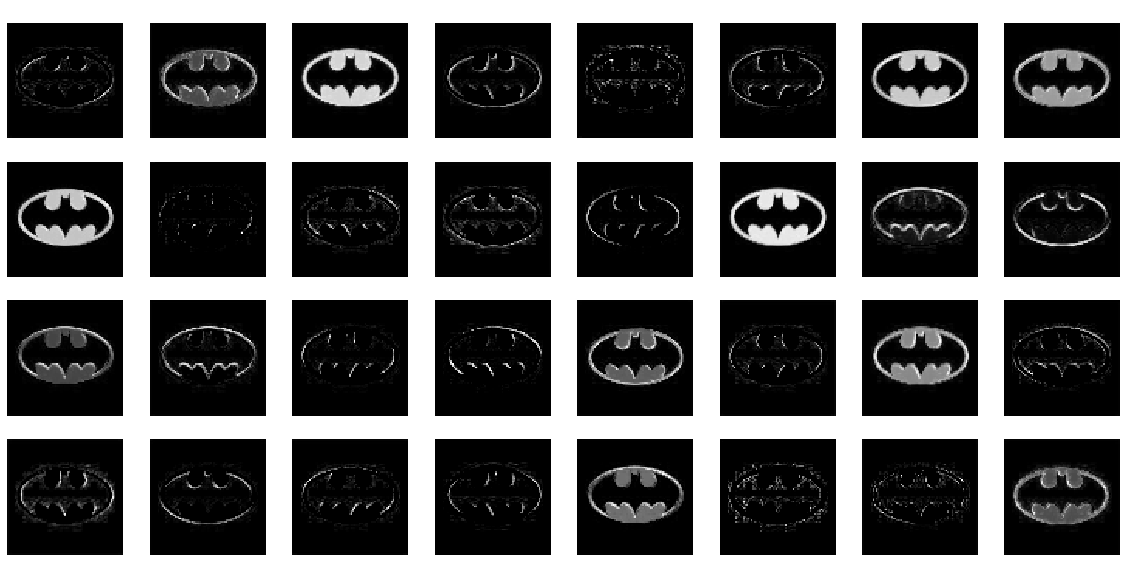

In [33]:
plot_model_filters(model.layers[:2], img)

In [0]:
history = train(model)
plot_accuracy_and_loss(history)

  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 4 steps, validate for 1 steps
Epoch 1/15
4/4 [==============================] - 13s 3s/step - loss: 0.9684 - accuracy: 0.6674 - val_loss: 0.6947 - val_accuracy: 0.3810
Epoch 2/15
4/4 [==============================] - 11s 3s/step - loss: 0.6942 - accuracy: 0.4500 - val_loss: 0.6915 - val_accuracy: 0.7143
Epoch 3/15
4/4 [==============================] - 11s 3s/step - loss: 0.6899 - accuracy: 0.7130 - val_loss: 0.6877 - val_accuracy: 0.7143
Epoch 4/15
4/4 [==============================] - 12s 3s/step - loss: 0.6750 - accuracy: 0.7130 - val_loss: 0.6499 - val_accuracy: 0.7143
Epoch 5/15
3/4 [=====================>........] - ETA: 2s - loss: 0.6191 - accuracy: 0.7108

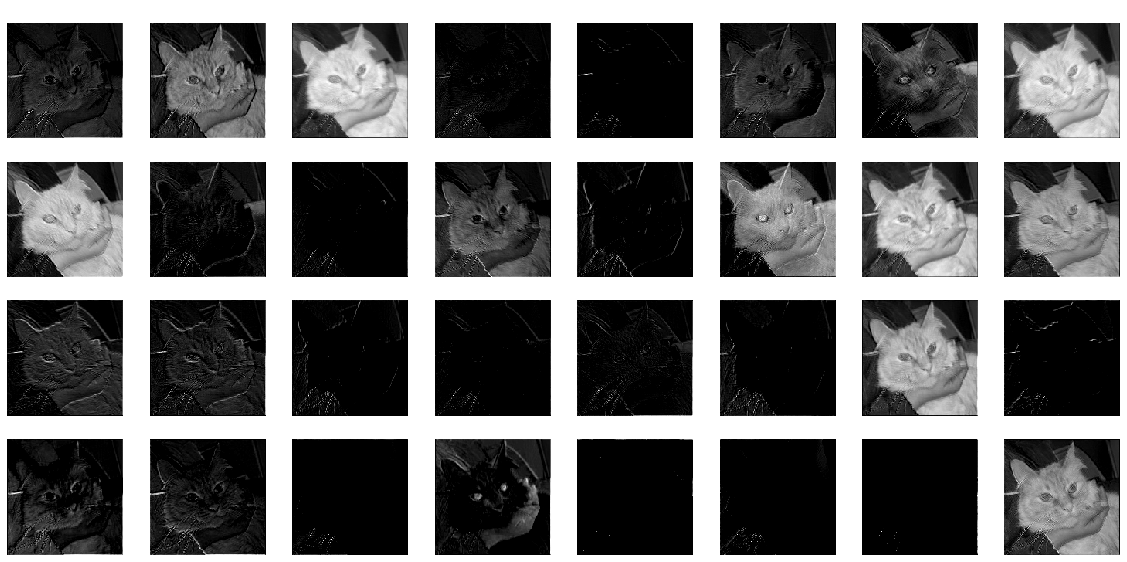

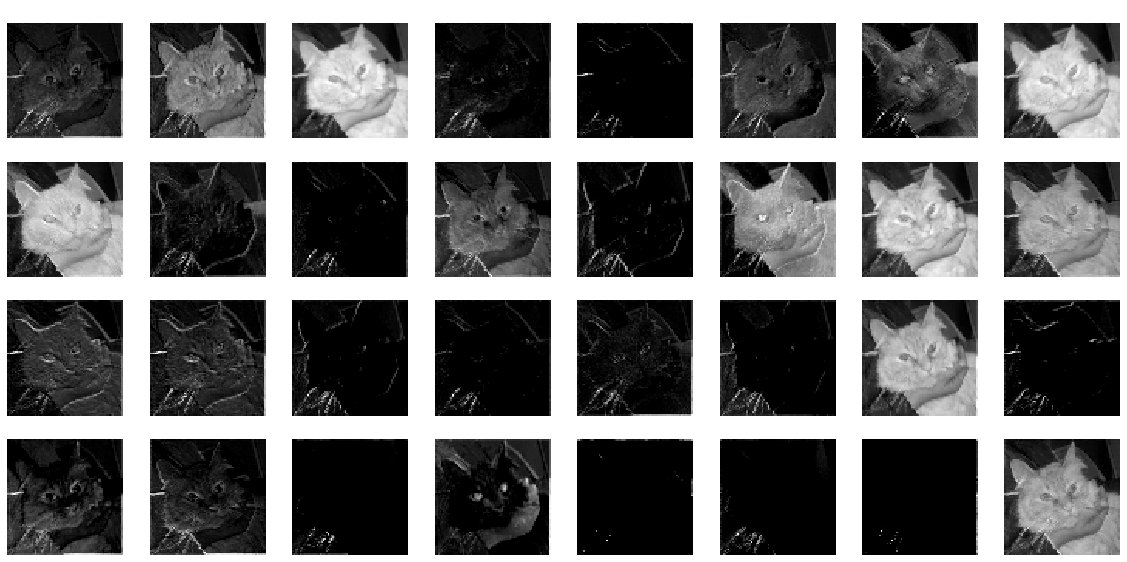

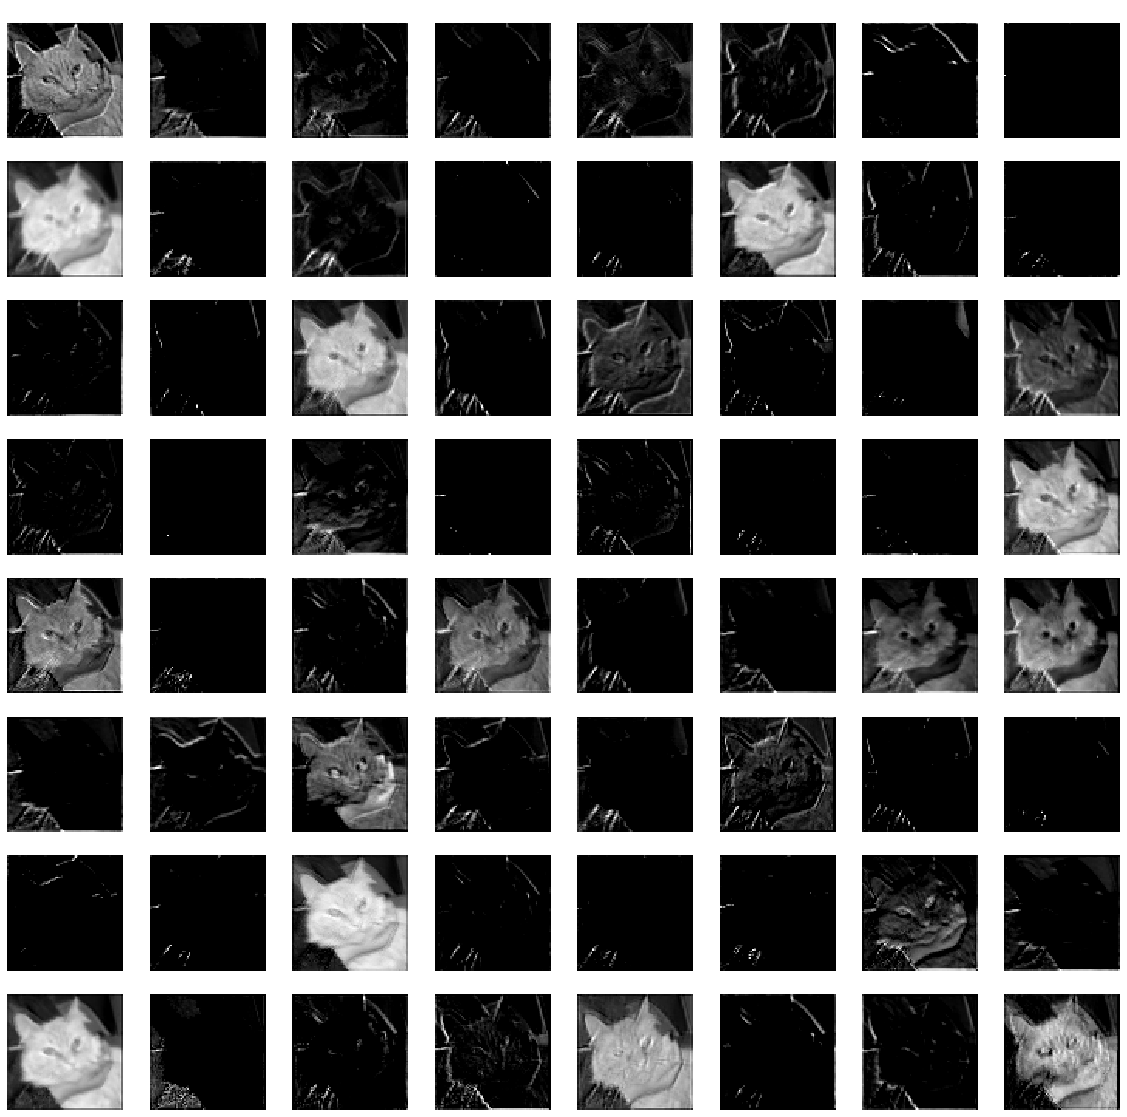

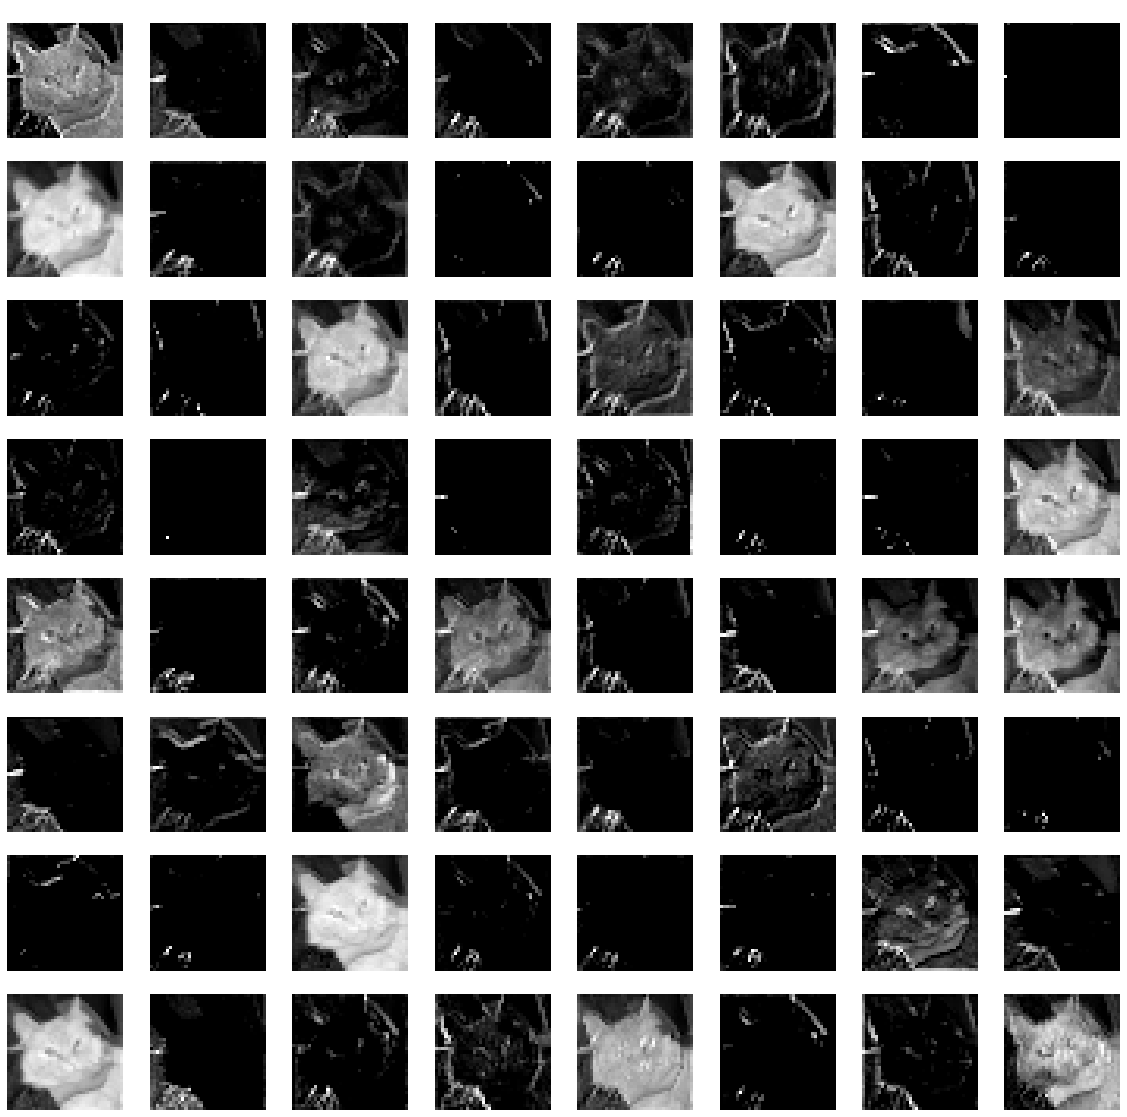

In [0]:
plot_model_filters(model.layers[:4], img)

#Overfitting

##Dropout

In [0]:
model = Sequential([
    Conv2D(32, 3, padding='same', activation='relu', input_shape=IMAGE_SIZE+(3,)),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 41472)            

In [0]:
history = train(model, train_data_gen)


  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 15 steps, validate for 7 steps
Epoch 1/15
15/15 [==============================] - 53s 4s/step - loss: 0.8235 - accuracy: 0.5085 - val_loss: 0.6879 - val_accuracy: 0.6049
Epoch 2/15
15/15 [==============================] - 54s 4s/step - loss: 0.6849 - accuracy: 0.5724 - val_loss: 0.6763 - val_accuracy: 0.5714
Epoch 3/15
15/15 [==============================] - 52s 3s/step - loss: 0.6664 - accuracy: 0.5924 - val_loss: 0.6478 - val_accuracy: 0.6071
Epoch 4/15
15/15 [==============================] - 52s 3s/step - loss: 0.6244 - accuracy: 0.6544 - val_loss: 0.6177 - val_accuracy: 0.6574
Epoch 5/15
15/15 [==============================] - 52s 3s/step - loss: 0.5736 - accuracy: 0.7115 - val_loss: 0.5928 - val_accuracy: 0.6663
Epoch 6/15
15/15 [==============================] - 52s 3s/step - loss: 0.5329 - accuracy: 0.7361 - val_loss: 0.5356 - val_accuracy: 0.7333
Epoch 7/15
15/15 [==============================] - 52s 3s/step - los

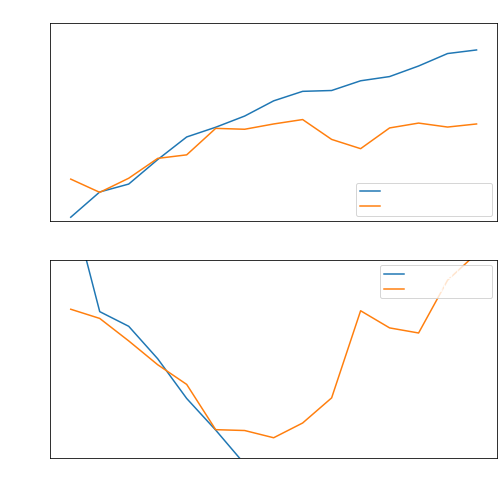

In [0]:
plot_accuracy_and_loss(history, acc_ylim=[0.5,1.0],loss_ylim=[0.5,0.75])

##Data augmentation

Found 2000 images belonging to 2 classes.


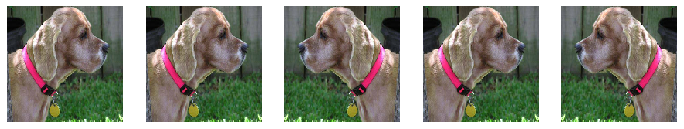

In [0]:
augmented_image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
augmented_train_data_gen = augmented_image_gen.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=IMAGE_SIZE,
                                                           class_mode='binary')
plot_images([augmented_train_data_gen[0][0][0] for i in range(5)])

Found 2000 images belonging to 2 classes.


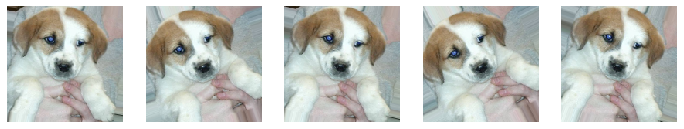

In [0]:
augmented_image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)
augmented_train_data_gen = augmented_image_gen.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=IMAGE_SIZE,
                                                           class_mode='binary')
plot_images([augmented_train_data_gen[0][0][0] for i in range(5)])

Found 2000 images belonging to 2 classes.


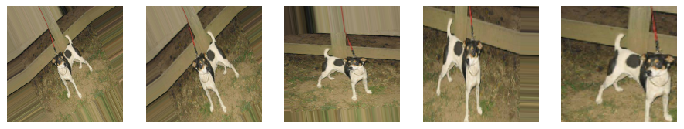

In [0]:
augmented_image_gen = ImageDataGenerator(
                                rescale=1./255,
                                rotation_range=45,
                                width_shift_range=.15,
                                height_shift_range=.15,
                                horizontal_flip=True,
                                zoom_range=0.5
                                )

augmented_train_data_gen = augmented_image_gen.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=IMAGE_SIZE,
                                                           class_mode='binary')
plot_images([augmented_train_data_gen[0][0][0] for i in range(5)])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 41472)            

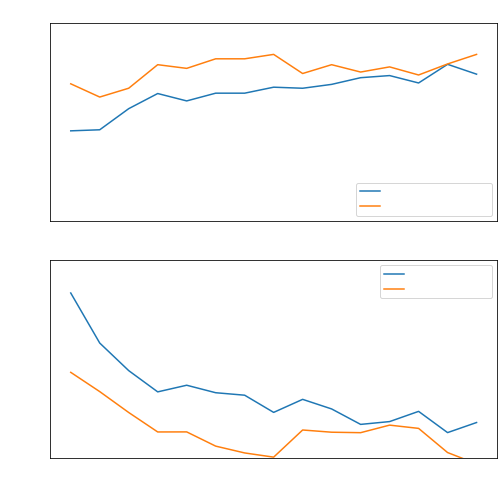

In [0]:
model.summary()
history = train(model, augmented_train_data_gen)
plot_accuracy_and_loss(history, acc_ylim=[0.5,0.8],loss_ylim=[0.5,0.75])